In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

C:\Users\duclh3\AppData\Local\Temp\ipykernel_1988\772124234.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
class CONFIG:
    DATA_DIR = "F:/Data/UPSELL_V4/"
    DATA_PATH = DATA_DIR + "data.csv"
    TARGET_COLUMNS = 'IS_UPSELL_NEXT_3_MONTHS'
    COL_TO_DROP = ['CUSTOMER_CODE', 'RANK_', 'CUSTOMER_CODE_INFO', 'LOAN_WID', 'THANG', 'CREATED_DT', 'LOAN_DPD', 'LAST_DATE', 'FIRST_DATE', 'MIN_DISB_DATE', 'DISBURSE_DATE_WID']
    TRAIN_DF = DATA_DIR + 'train.csv'
    TEST_DF = DATA_DIR+ 'test.csv'
    INFER_DF = DATA_DIR+ 'INFER_UPSELL_DATA_202303310903_infer.csv'

In [3]:
train_df = pd.read_csv(CONFIG.TRAIN_DF, low_memory=False)

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
'IS_UPPSELL_NEXT_3_MONTH' in train_df.columns

False

<AxesSubplot:xlabel='TRADE_LEAD', ylabel='count'>

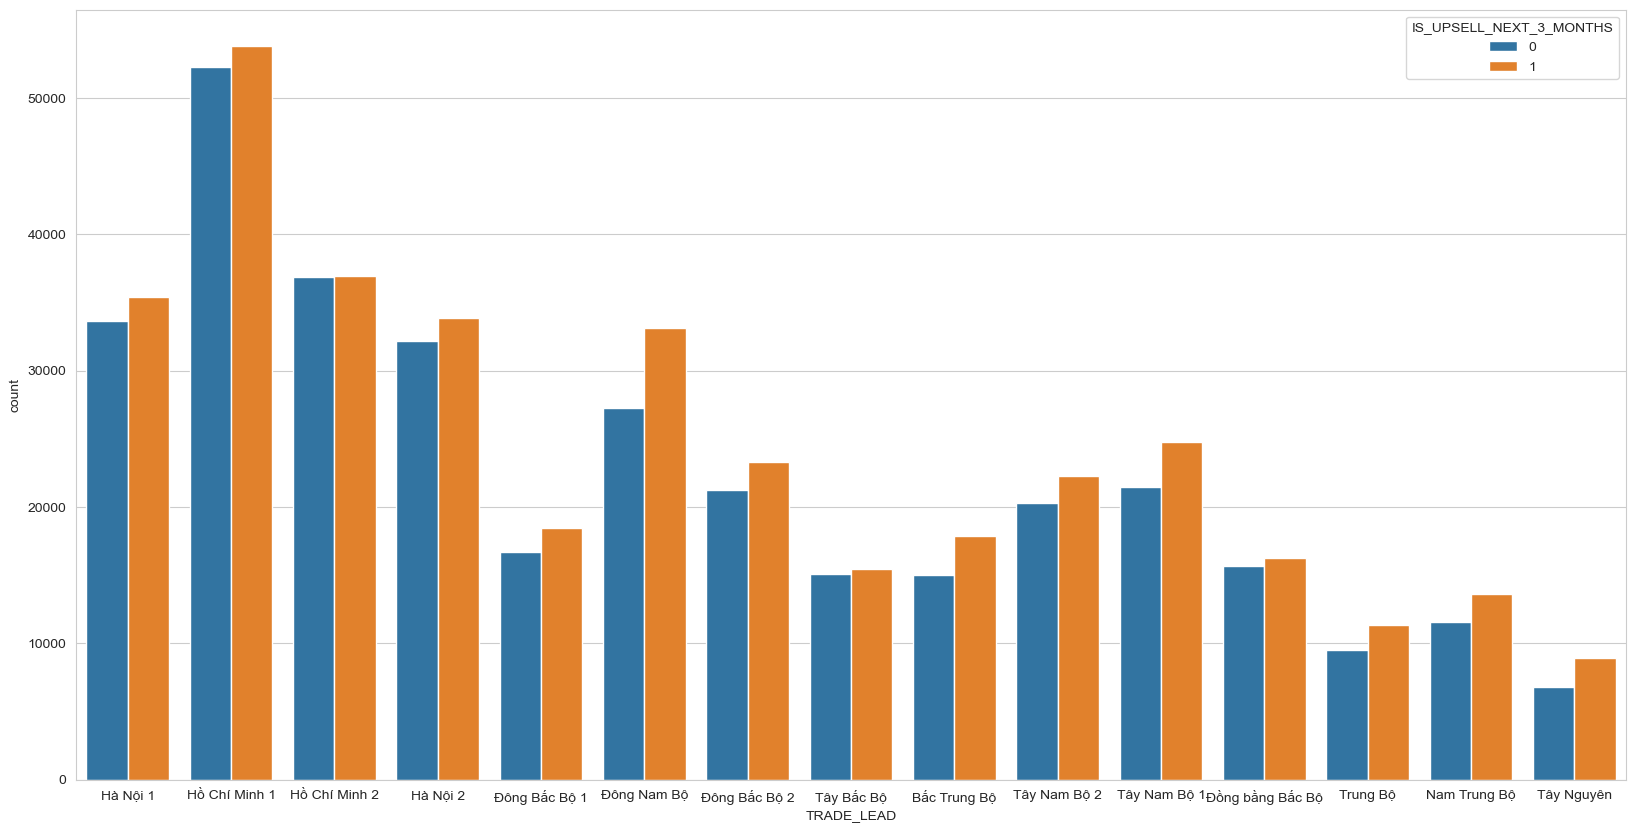

In [8]:
plt.figure(figsize=(20,10))
sns.countplot(x='TRADE_LEAD', hue='IS_UPSELL_NEXT_3_MONTHS', data=train_df)

In [14]:
te = train_df[['TRADE_LEAD','IS_UPSELL_NEXT_3_MONTHS']].groupby('TRADE_LEAD').agg(['mean', 'count']).reset_index()
te.columns = ['TRADE_LEAD','TE_mean','TE_count']


TRADE_LEAD   TE_mean  TE_count
0       Bắc Trung Bộ  0.543216     32847
1           Hà Nội 1  0.512439     69015
2           Hà Nội 2  0.513165     66010
3      Hồ Chí Minh 1  0.507078    106033
4      Hồ Chí Minh 2  0.500366     73818
5       Nam Trung Bộ  0.541711     25185
6           Trung Bộ  0.543741     20850
7         Tây Bắc Bộ  0.506231     30575
8       Tây Nam Bộ 1  0.535166     46210
9       Tây Nam Bộ 2  0.522776     42544
10        Tây Nguyên  0.569175     15721
11     Đông Bắc Bộ 1  0.525012     35123
12     Đông Bắc Bộ 2  0.522987     44546
13       Đông Nam Bộ  0.548709     60318
14  Đồng bằng Bắc Bộ  0.508661     31923

In [15]:
train_df.merge(te, how='left', on='TRADE_LEAD')

TIME_TO_DISBURSE   DATE_TIME NEXT_DISBURSE_DATE_WID  LOAN_STATUS  \
0                     12  2020-01-31             2021-01-31            1   
1                      5  2020-01-31             2020-06-30            1   
2                      4  2020-01-31             2020-05-31            1   
3                      1  2020-01-31             2020-02-29            1   
4                      6  2020-01-31             2020-07-31            1   
...                  ...         ...                    ...          ...   
709221                10  2022-03-31             2023-01-31            1   
709222                 1  2021-11-30             2021-12-31            1   
709223                 8  2022-05-31             2023-01-31            1   
709224                 7  2022-06-30             2023-01-31            1   
709225                 4  2022-09-30             2023-01-31            1   

        CURENT_LTV  INCREASE_RATIO  CURRENT_DPD  PRINCIPAL_REMAIN  \
0         0.588235             NaN          0.0         2611198.0   
1         0.361111             NaN          0.0         8522932.0   
2         0.596491             NaN          0.0         4807234.0   
3         0.594966             NaN          0.0        11400762.0   
4         0.600000             NaN          0.0         2880050.0   
...            ...             ...          ...               ...   
709221    0.650000             NaN         -8.0         2167380.0   
709222    0.634115             NaN        -18.0         8098870.0   
709223    0.660377             NaN        -19.0         6244419.0   
709224    0.660377             NaN        -19.0         5821732.0   
709225    0.687500             NaN        -17.0         1807725.0   

        MAX_DPD_EVR  MAX_DPD_12M  ...  NUMBER_OF_CHILD         ZALO  \
0                 0            0  ...              NaN          NaN   
1                 0            0  ...              NaN          NaN   
2                 0            0  ...              NaN          NaN   
3                 1            1  ...              NaN          NaN   
4                 0            0  ...              NaN          NaN   
...             ...          ...  ...              ...          ...   
709221            1            1  ...              NaN          NaN   
709222            0            0  ...              NaN          NaN   
709223           -1           -1  ...              NaN          NaN   
709224           -1           -1  ...              NaN          NaN   
709225            8            8  ...              2.0  396524886.0   

               FACEBOOK  MONTHLY_INCOME_VALUE  SALARY_TYPE_CODE  \
0                   NaN                   NaN               NaN   
1                   NaN                   NaN               NaN   
2                   NaN                   NaN               NaN   
3                   NaN                   NaN               NaN   
4                   NaN                   NaN               NaN   
...                 ...                   ...               ...   
709221              NaN                   NaN               NaN   
709222              NaN                   NaN               NaN   
709223              NaN                   0.0               NaN   
709224              NaN                   0.0               NaN   
709225  100039855922587                   0.0               NaN   

                GRP_NM                               JOB_NM_WCD  \
0         5 -> 8 triệu           Thợ làm tóc/trang điểm/Spa   
1        8 -> 10 triệu                           Không xác định   
2        8 -> 10 triệu                               Bán hàng   
3         5 -> 8 triệu                           Không xác định   
4       10 -> 15 triệu                           Không xác định   
...                ...                                      ...   
709221    5 -> 8 triệu                               Bán hàng   
709222  10 -> 15 triệu                      Tài xế công nghệ   
70922

In [ ]:
test_df.merge(te)

In [7]:
df = pd.DataFrame({
    "threshold": [.2,.3,.4,.5,.6,.7,.8,.9],
    "type error I": [0.75, 0.5, 0.0833333333, 0.0833333333,0,0,0,0],
    "type error II": [0,0,.125, .375, .5, .625, .75, .875]
})

Text(0, 0.5, '')

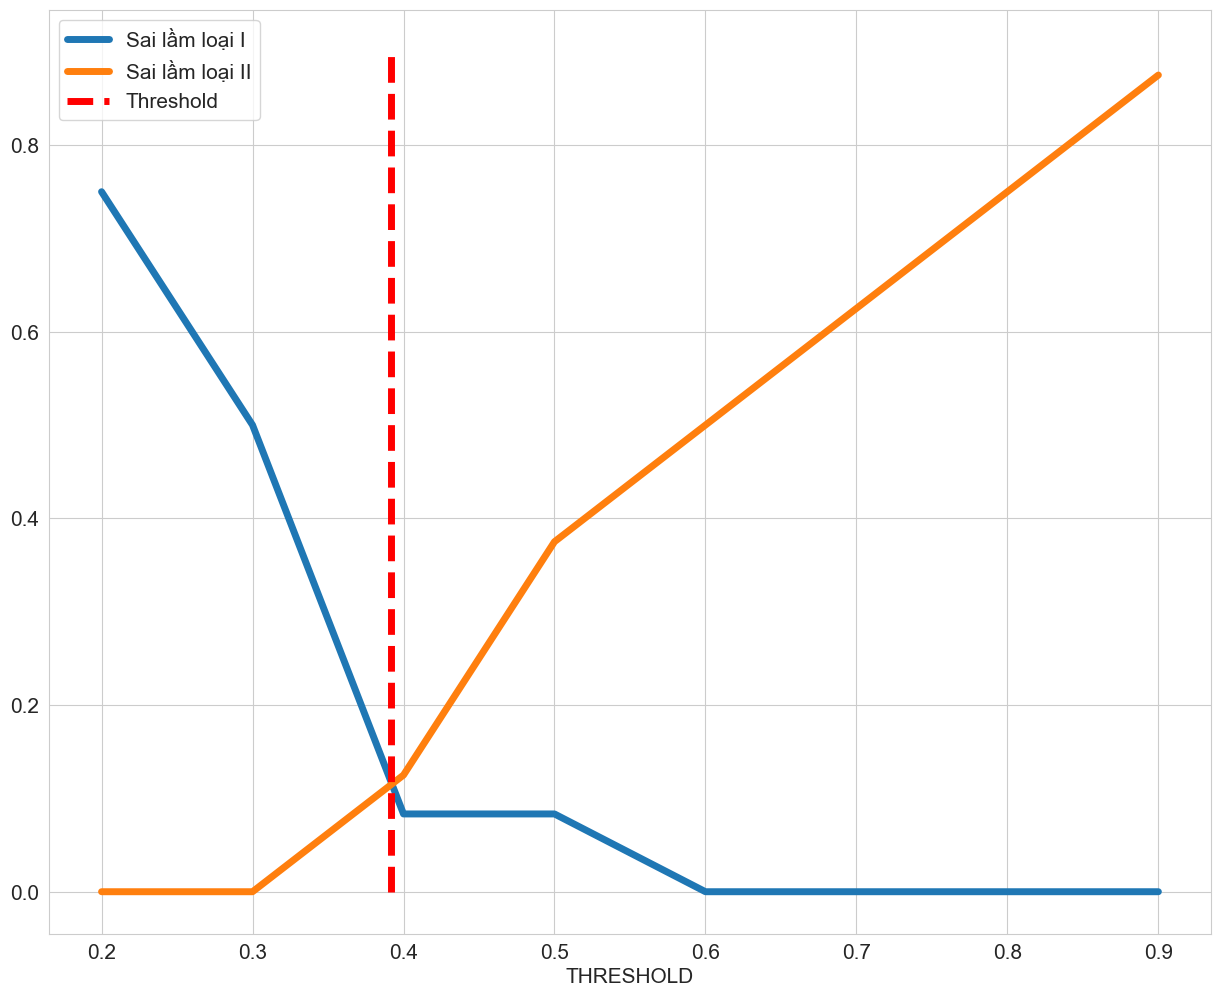

In [38]:
plt.figure(figsize=(15,12))
sns.lineplot(x='threshold', y='type error I', data=df, linewidth=5)
sns.lineplot(x='threshold', y='type error II', data=df,linewidth=5)
plt.plot([0.392, 0.392], [0, 0.9], color='red', linestyle='dashed',linewidth=5)
plt.legend(labels=['Sai lầm loại I', 'Sai lầm loại II', 'Threshold'],fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('THRESHOLD',fontsize=15)
plt.ylabel('',fontsize=15)